# HEALTH AND MEDICINES
### CDC DIABETES_HEALTH_INDICATORS

##### NAME: AKHILA MARIA JOSEPH 
##### ORGANISATION: ENTRI ELEVATE
##### DATE:

## 1.OVERVIEW OF THE PROBLEM

The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 22 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy.

## 2. OBJECTIVE

The objective of the Diabetes Health Indicators Dataset is to develop a classification model that can predict the diabetes status of individuals based on their demographic data, lab test results, and survey responses. The target variable has three classes:

1. Healthy - Individuals with no signs of diabetes.
2. Pre-diabetic - Individuals at risk of developing diabetes.
3. Diabetic - Individuals diagnosed with diabetes.

The goal is to create an accurate and interpretable model to assist healthcare providers in early detection and 
intervention planning for diabetes management.

## 3. DATA DESCRIPTION

#### DATA SOURCE:
https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

#### FEATURES: 

The Diabetes Health Indicators Dataset consists of 22 features, which can be broadly categorized as follows:

##### 1. Demographic Features
1. Age: Age of the individual.
2. Sex: Gender of the individual.
3. Race/Ethnicity: Self-identified race or ethnicity of the individual.
4. Income Level: Socioeconomic status, categorized by income brackets.

##### 2. Lab Test Results
1. Cholesterol Levels: Total cholesterol and HDL/LDL ratios.
2. Glucose Levels: Fasting blood glucose levels.
3. A1C: Hemoglobin A1C percentage, a marker for average blood sugar levels.

##### 3. Health Metrics
1. BMI (Body Mass Index): Weight-for-height index.
2. Blood Pressure: Systolic and diastolic blood pressure measurements.
3. Heart Rate: Resting heart rate.

#####4. Lifestyle and Survey Responses
1. Physical Activity: Frequency and intensity of exercise.
2. Dietary Habits: Intake of fruits, vegetables, and sugar-sweetened beverages.
3. Smoking Status: Current, former, or non-smoker.
4. Alcohol Consumption: Frequency and amount of alcohol intake.
5. Sleep Duration: Average hours of sleep per night.

##### 5. Chronic Conditions and Risk Factors
1. Heart Disease History: Presence of cardiovascular diseases.
2. Hypertension: Diagnosed high blood pressure.
3. Obesity: Based on BMI categories.
4. Kidney Disease: Presence of chronic kidney disease.

##### 6. Survey Responses (Behavioral)
1. Perceived Health Status: Self-assessed overall health (excellent, good, fair, poor).
2. Healthcare Access: Frequency of medical visits or screenings.
3. Stress Levels: Reported levels of psychological stress.

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings

print(" Successfully Imported all the Libraries")
warnings.filterwarnings("ignore")

 Successfully Imported all the Libraries


## 4. DATA COLLECTION

In [3]:
db = pd.read_csv('diabetes.csv')
print(db.head())

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

## 5. DATA PREPROCESSING:- DATA CLEANING
### 1. Identify Missing Values
##### Check for missing values

In [4]:
print(db.isnull().sum())

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


## OBSERVATION: 
#### 1. No Missing Values: 
All features appear to have complete data.
#### 2. Potential Outliers:
BMI: Maximum value of 98 might be an outlier.
Health Metrics (MentHlth, PhysHlth): Max values of 30 days are plausible but may skew the distribution.

### 2. Identify the Outliers

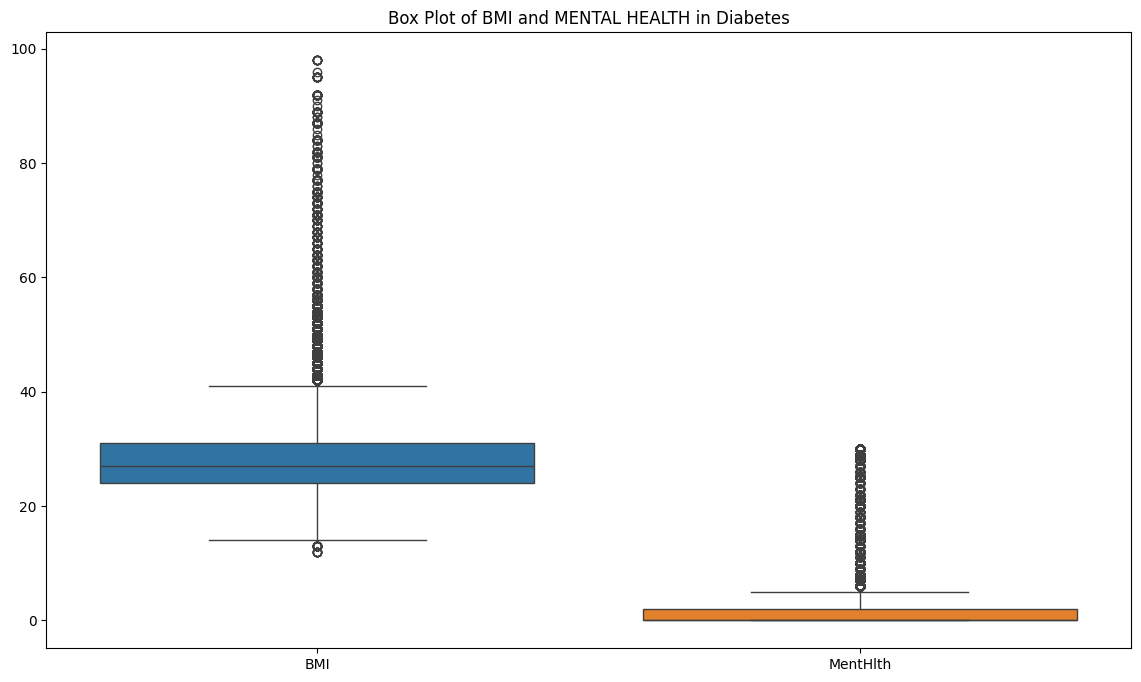

In [6]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=db[['BMI', 'MentHlth']])
plt.title('Box Plot of BMI and MENTAL HEALTH in Diabetes')
plt.show()

### 3. Remove the Outlliers

In [8]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

db = remove_outliers_iqr(db, ['BMI', 'MentHlth'])
db

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
253676,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
253677,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
253678,NaN,NaN,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


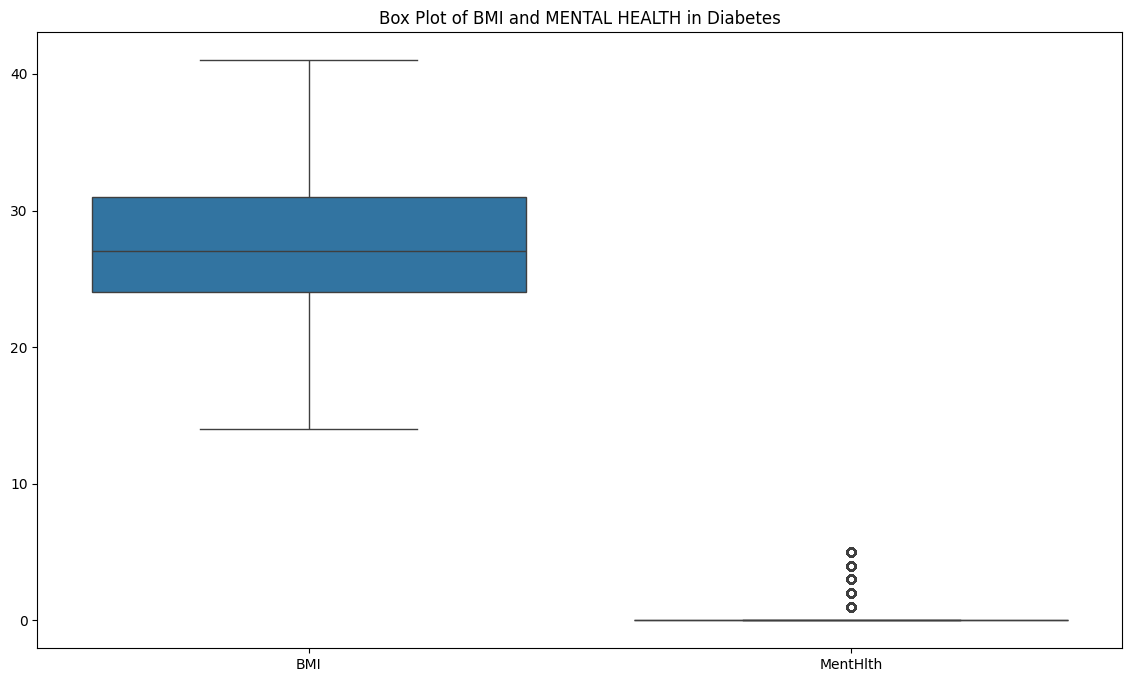

In [9]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=db[['BMI', 'MentHlth']])
plt.title('Box Plot of BMI and MENTAL HEALTH in Diabetes')
plt.show()

In [13]:
skewness = db[['BMI', 'MentHlth']].skew()
print("Skewness:")
print(skewness)

Skewness:
BMI         0.454307
MentHlth    2.434642
dtype: float64


# 6. EXPLORATORY DATA ANALYSIS (EDA)

Exploratory Data Analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

In [15]:
db.shape

(253680, 22)

In [16]:
db.describe() # summary statistics

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,0.0,0.0,0.0,0.0,243833.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,217472.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,27.569492,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.538437,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,4.964920,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.269547,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          0 non-null       float64
 1   HighBP                0 non-null       float64
 2   HighChol              0 non-null       float64
 3   CholCheck             0 non-null       float64
 4   BMI                   243833 non-null  float64
 5   Smoker                0 non-null       float64
 6   Stroke                0 non-null       float64
 7   HeartDiseaseorAttack  0 non-null       float64
 8   PhysActivity          0 non-null       float64
 9   Fruits                0 non-null       float64
 10  Veggies               0 non-null       float64
 11  HvyAlcoholConsump     0 non-null       float64
 12  AnyHealthcare         0 non-null       float64
 13  NoDocbcCost           0 non-null       float64
 14  GenHlth               0 non-null       float64
 15  

In [19]:
# Unique Values
db["BMI"].unique()

array([40., 25., 28., 27., 24., 30., 34., 26., 33., 21., 23., 22., 38.,
       32., 37., 31., 29., 20., 35., nan, 39., 19., 18., 36., 17., 16.,
       41., 14., 15.])

In [20]:
db["Age"].unique()

array([nan])

In [24]:
sns.set(style="whitegrid")

## 1. HISTOGRAM

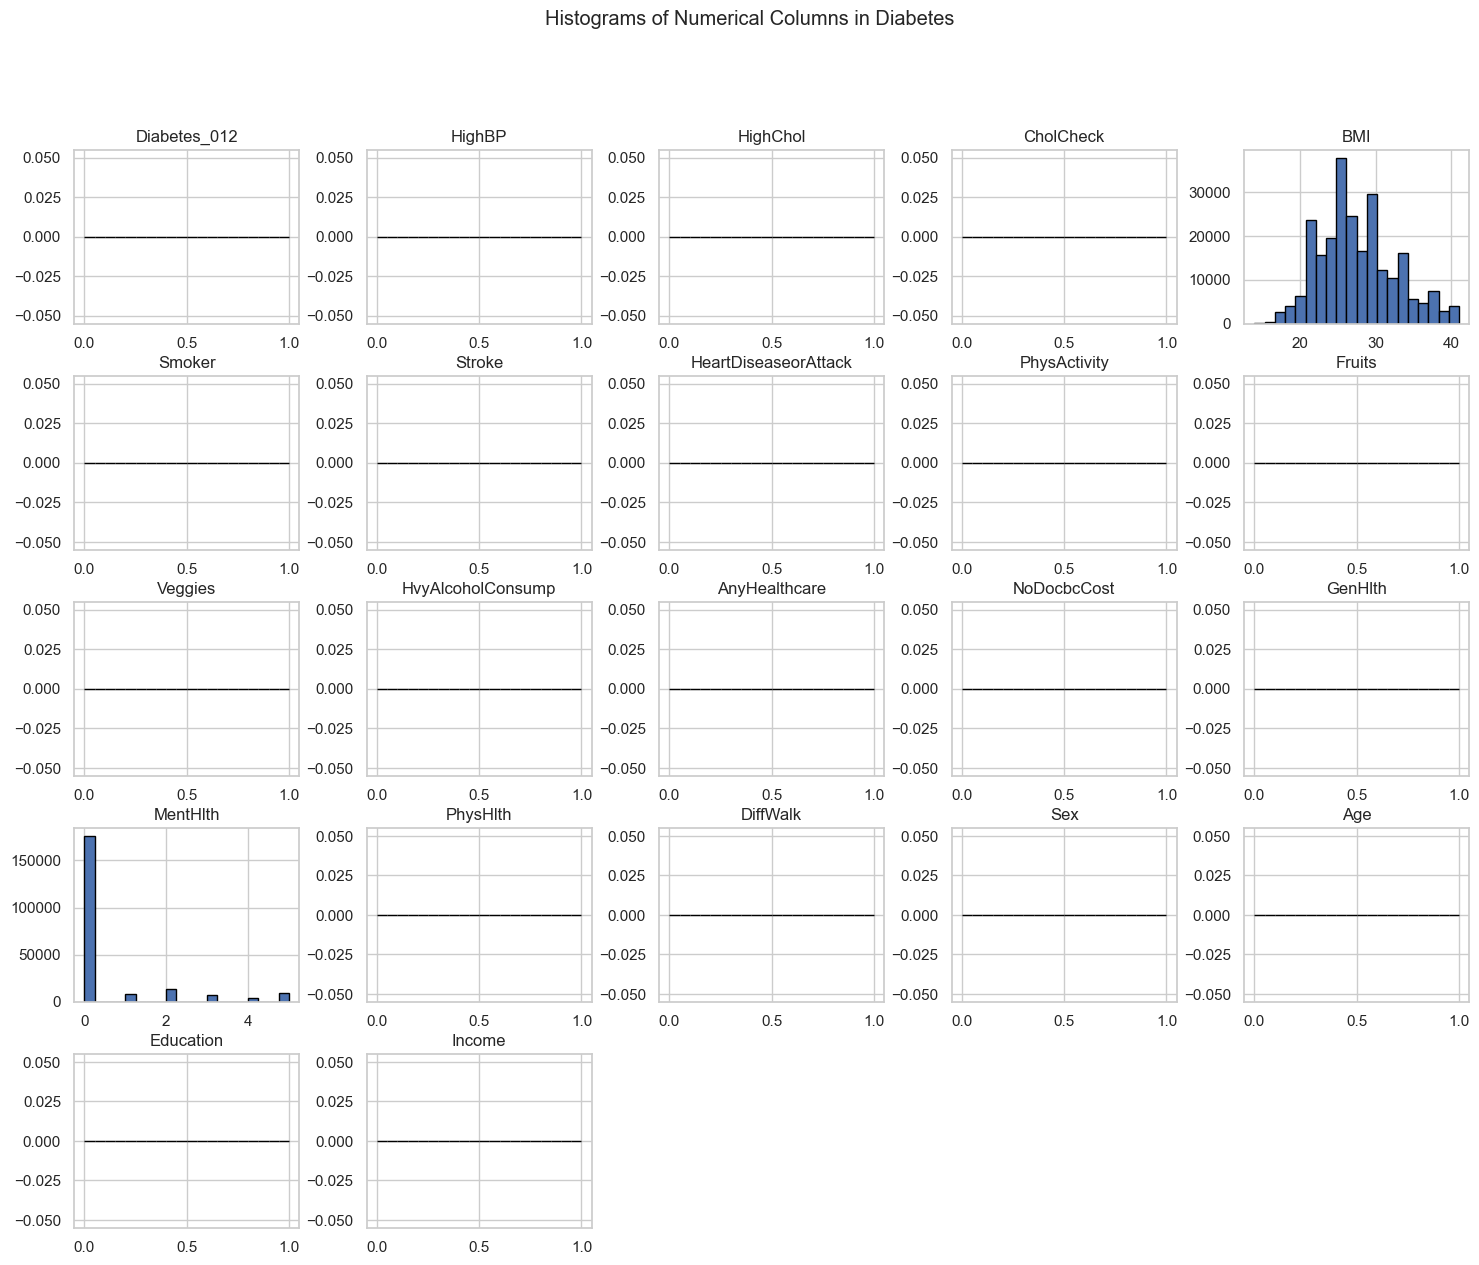

In [31]:
db.hist(figsize=(18, 14), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Columns in Diabetes')
plt.show()

## 2. HEATMAP

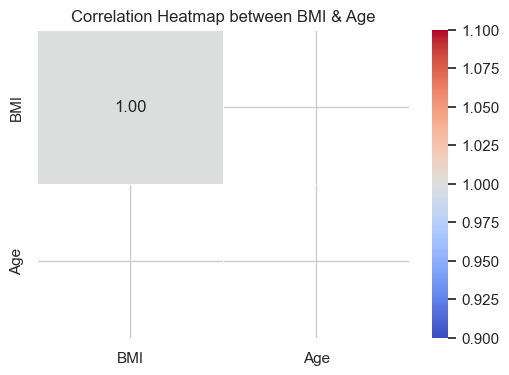

In [41]:
# Compute the correlation matrix for the two columns
corr_matrix = db[['BMI', 'Age']].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap between BMI & Age')
plt.show()

### Correaltion

In [42]:
correlation = db['BMI'].corr(db['Age'])
print("Correlation between BMI and Age :", correlation)

Correlation between BMI and Age : nan


## 3. BOXPLOT

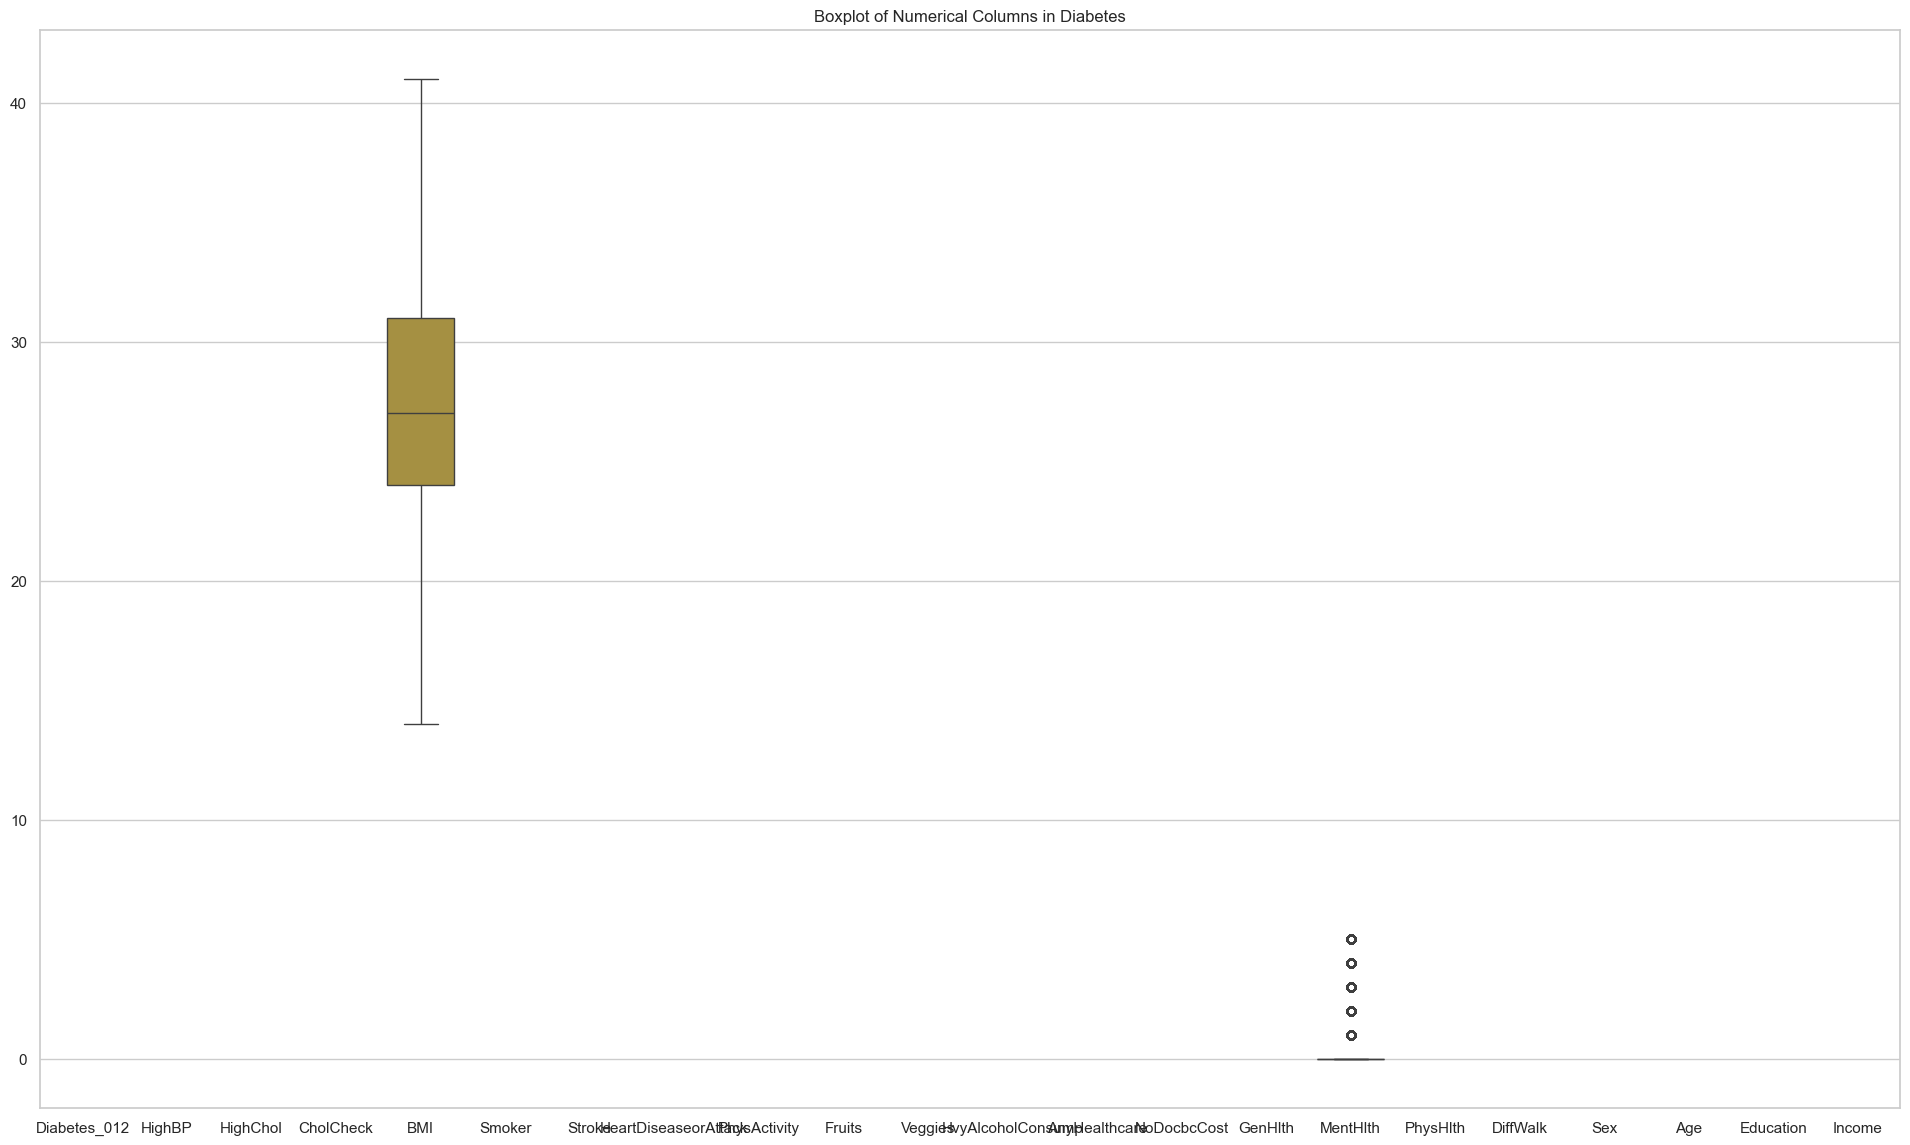

In [48]:
plt.figure(figsize=(24, 14))
sns.boxplot(data=db.select_dtypes(include=[np.number]))
plt.title('Boxplot of Numerical Columns in Diabetes')
plt.show()

## 4. PAIR PLOT

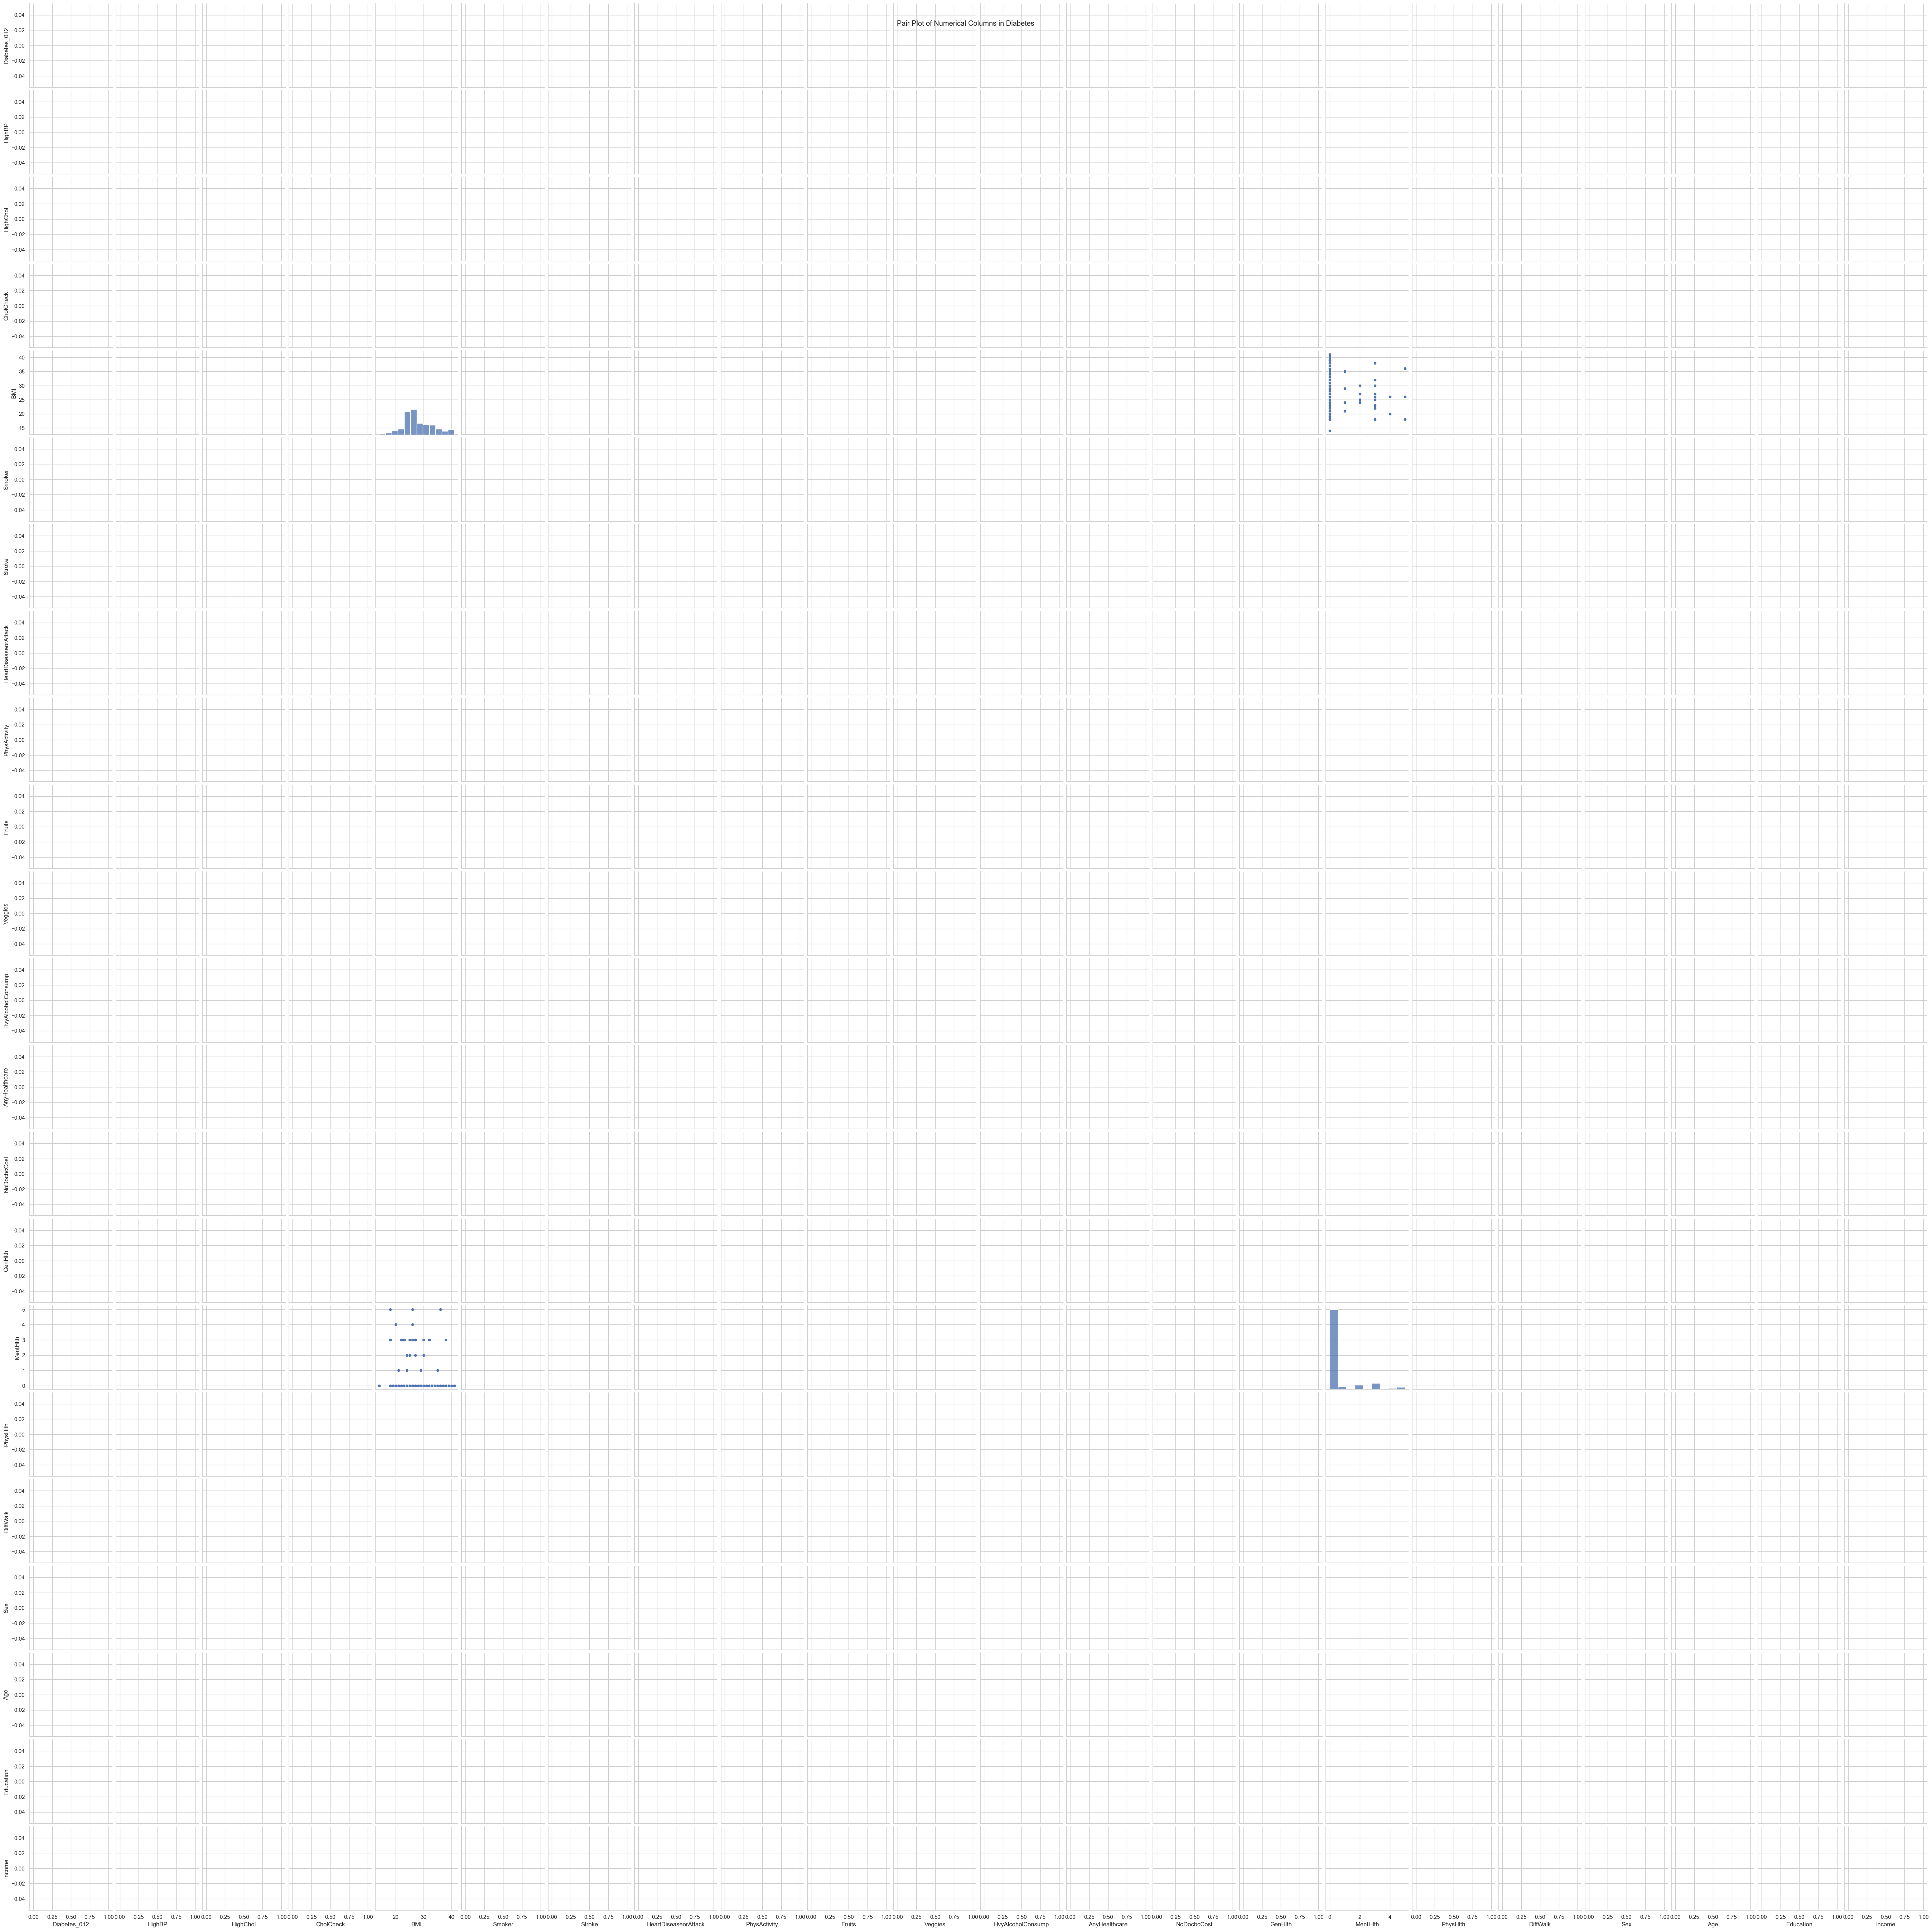

In [50]:
sns.pairplot(db.select_dtypes(include=[np.number]).sample(200))
plt.suptitle('Pair Plot of Numerical Columns in Diabetes')
plt.show()

## 5. BARPLOT

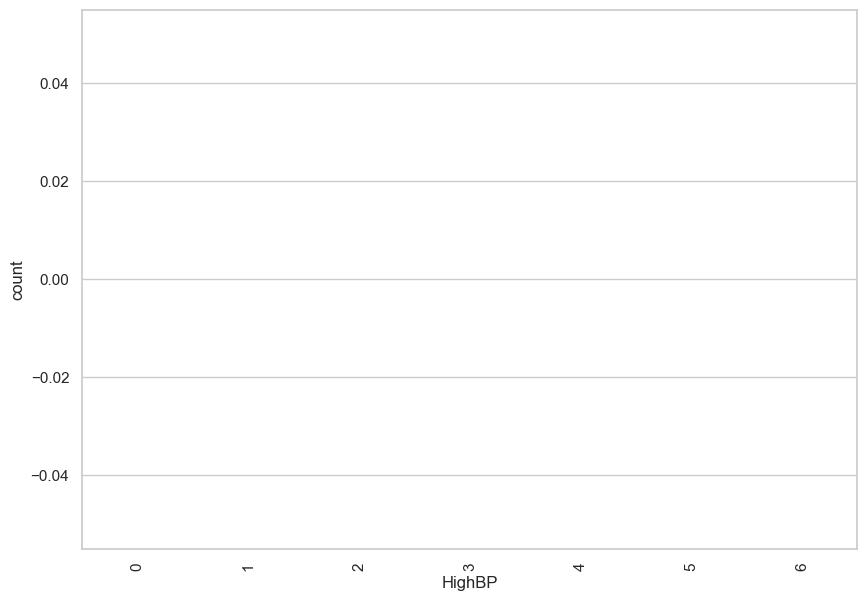

In [61]:
plt.figure(figsize=(10, 7))
sns.countplot(x='HighBP', data=db, color='g', order=db['HighBP'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

## 6. PIE DIAGRAM

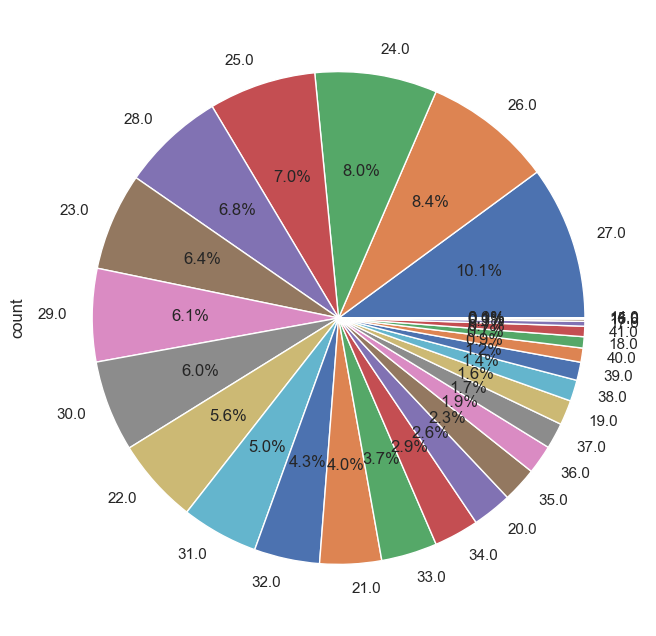

In [59]:
db['BMI'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.show()

## 7. KDE

In [60]:
print(db.columns)

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


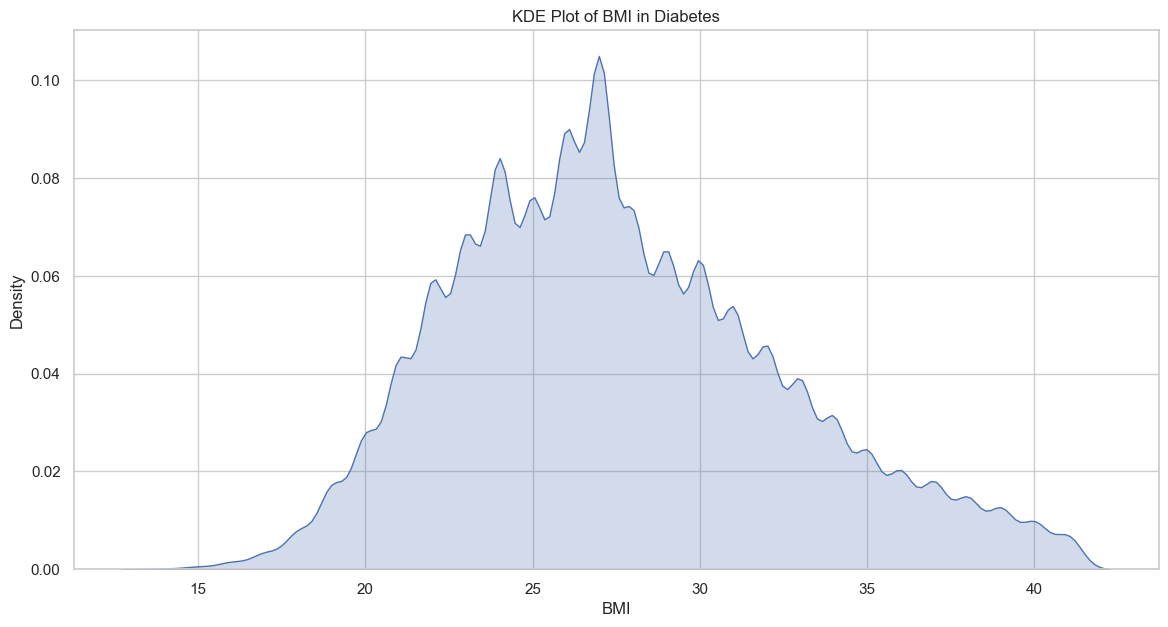

In [64]:
plt.figure(figsize=(14, 7))
sns.kdeplot(db['BMI'], shade=True)
plt.title('KDE Plot of BMI in Diabetes')
plt.show()

# 7. FEATURE ENGINEERING
Feature engineering is an essential part of preparing data for machine learning models. Categorical features often need to be encoded into numerical 
representations so that models can process them. Below is the code that identifies and encodes categorical features using both one-hot encoding 
and label encoding.

In [65]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [66]:
# Identify categorical columns
categorical_cols_db = db.select_dtypes(include=['object']).columns

# Initialize Label Encoder
label_encoders = {}

# Apply Label Encoding to categorical columns in diabetes
for col in categorical_cols_db:
    label_encoders[col] = LabelEncoder()
    db[col] = label_encoders[col].fit_transform(db[col])

# One-Hot Encoding for categorical columns
# Diabetes One-Hot Encoding
db_onehot = pd.get_dummies(db, columns=categorical_cols_db, drop_first=True)

# Display the first few rows of the transformed data
print("Diabetes after One-Hot Encoding:")
print(db_onehot.head())

Diabetes after One-Hot Encoding:
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           NaN     NaN       NaN        NaN  40.0     NaN     NaN   
1           NaN     NaN       NaN        NaN  25.0     NaN     NaN   
2           NaN     NaN       NaN        NaN  28.0     NaN     NaN   
3           NaN     NaN       NaN        NaN  27.0     NaN     NaN   
4           NaN     NaN       NaN        NaN  24.0     NaN     NaN   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   NaN           NaN     NaN  ...            NaN   
1                   NaN           NaN     NaN  ...            NaN   
2                   NaN           NaN     NaN  ...            NaN   
3                   NaN           NaN     NaN  ...            NaN   
4                   NaN           NaN     NaN  ...            NaN   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0          NaN      NaN       NaN       NaN       NaN

# 8. FEATURE SELECTION:
Feature selection is the process of identifying and selecting a subset of relevant features (variables, predictors) from the entire set of features in a dataset, which are most useful for a given machine learning model or task. 
The goal of feature selection is to improve the performance of the model by reducing overfitting, enhancing model interpretability, and decreasing training time.

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif

In [70]:
# Define X (features) and y (target)

X_db = db.drop(columns=['NoDocbcCost'])  # Drop the target column

# Feature Importance using Random Forest (for Matches)
rf_db = RandomForestClassifier(n_estimators=100, random_state=42)
rf_db.fit(X_db)

# Get feature importance
importance_db = rf_db.feature_importances_

# Plot feature importance
plt.figure(figsize=(12, 8))
indices = np.argsort(importance_db)[::-1]
plt.title("Feature Importance Diabetes Dataset")
plt.bar(range(X_db.shape[1]), importance_db[indices])
plt.xticks(range(X_db.shape[1]), X_db.columns[indices], rotation=90)
plt.show()


# Feature Selection using SelectKBest (for Matches)
k_best_db = SelectKBest(score_func=f_classif, k=10)
k_best_db.fit(X_db)

# Get selected features
selected_features_db = X_db.columns[k_best_db.get_support()]

print("Top 10 Selected Features Diabetes Dataset:")
print(selected_features_db)


TypeError: BaseForest.fit() missing 1 required positional argument: 'y'

In [ ]:
# Define X (features) and y (target)

X_db = db.drop(columns=['NoDocbcCost'])  # Drop the target column

# Feature Importance using Random Forest (for Matches)
rf_db = RandomForestClassifier(n_estimators=100, random_state=42)
rf_db.fit(X_db, y_db)

# Get feature importance
importance_db = rf_db.feature_importances_

# Plot feature importance
plt.figure(figsize=(12, 8))
indices = np.argsort(importance_db)[::-1]
plt.title("Feature Importance Diabetes Dataset")
plt.bar(range(X_db.shape[1]), importance_db[indices])
plt.xticks(range(X_db.shape[1]), X_db.columns[indices], rotation=90)
plt.show()


# Feature Selection using SelectKBest (for Matches)
k_best_db = SelectKBest(score_func=f_classif, k=10)
k_best_db.fit(X_db, y_db)

# Get selected features
selected_features_db = X_db.columns[k_best_db.get_support()]

print("Top 10 Selected Features Diabetes Dataset:")
print(selected_features_db)
